In [2]:
!wget https://raw.githubusercontent.com/ACloudGuru-Resources/Course_AWS_Certified_Machine_Learning/master/Chapter5/car_data.csv 

--2020-11-04 11:35:01--  https://raw.githubusercontent.com/ACloudGuru-Resources/Course_AWS_Certified_Machine_Learning/master/Chapter5/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.24.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.24.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108982 (106K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>] 106.43K  --.-KB/s    in 0.003s  

2020-11-04 11:35:01 (39.5 MB/s) - ‘car_data.csv.1’ saved [108982/108982]



In [ ]:
# Which month generates the most sales?
# Which car salesman sold the most cars?
# Which dealership sold the most cars?
# In what year was the averagr price of a Corvette greater than 100K?
# Which car has several points in the box plots far right upper quartile for the engines horsepower?


In [1]:
import pandas as pd

car_sales_df = pd.read_csv("./car_data.csv")
car_sales_df

,car,year,engine_hp,avg_mpg,price,salesman,dealership,sold_date,sold_month
0,Corvette,2011,335.0,22.5,46135,2,Big Bobs,2012-05-06,5
1,Corvette,2011,300.0,23.5,40650,2,Uptown Cars,2011-05-16,5
2,Corvette,2011,300.0,24.0,36350,2,Uptown Cars,2013-07-31,7
3,Corvette,2011,230.0,23.0,29450,2,Uptown Cars,2014-07-05,7
4,Corvette,2011,230.0,23.0,34500,2,Uptown Cars,2013-05-20,5
...,...,...,...,...,...,...,...,...,...
1956,Corvette,2016,240.0,28.0,49700,4,Uptown Cars,2019-09-09,9
1957,Corvette,2016,335.0,20.5,66350,2,Car Town,2017-04-29,4
1958,Corvette,2001,394.0,15.5,128000,4,Uptown Cars,2002-05-15,5
1959,Corvette,2002,394.0,15.5,130000,2,Uptown Cars,2002-05-07,5


In [20]:
# Which month generates the most sales?
sales_agg_df = car_sales_df.groupby(['sold_month']).size()
most_sold_month = sales_agg_df.idxmax()

print("Month {} had the most sales".format(most_sold_month))

Month 5 had the most sales


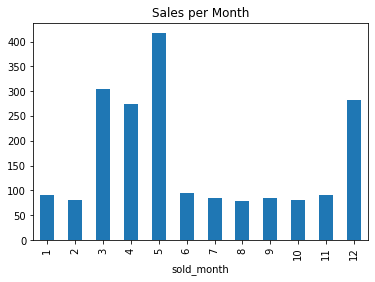

In [23]:
sales_agg_df.plot(kind="bar", title= "Sales per Month")

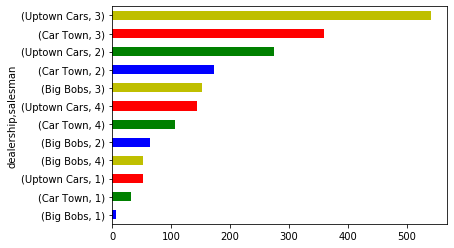

In [44]:
color_list = ['b', 'g', 'r', 'y']
salesman_sales_series = car_sales_df.groupby(['dealership', 'salesman',]).size().sort_values()
best_salesman = salesman_sales_series.idxmax()

salesman_sales_series.plot(kind='barh', color=color_list)

In [41]:
print("The best salesman is {}".format(best_salesman))

The best salesman is ('Uptown Cars', 3)


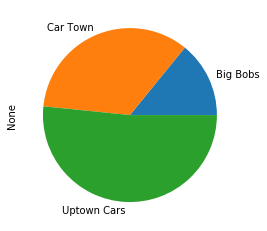

In [48]:
color_list = ['b', 'g', 'r', 'y']
dealership_sales_series = car_sales_df.groupby(['dealership']).size().sort_values()
best_dealership = dealership_sales_series.idxmax()

dealership_sales_series.plot(kind='pie')

In [46]:
print("The best dealership is {}".format(best_dealership))

The best dealership is Uptown Cars


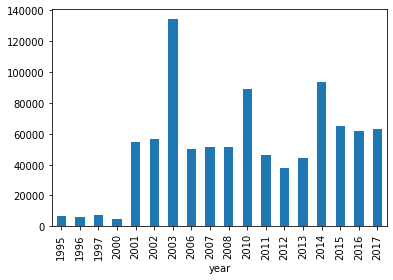

In [67]:
average_car_price = car_sales_df.groupby(['car', 'year']).mean()['price']
average_car_price['Corvette'].plot(kind='bar')

In [80]:
car_sales_df[car_sales_df.car.eq("Camaro")]["engine_hp"]

118     270.0
119     270.0
120     270.0
121     270.0
122     270.0
        ...  
1931    106.0
1932    106.0
1933    106.0
1934    106.0
1935    106.0
Name: engine_hp, Length: 746, dtype: float64

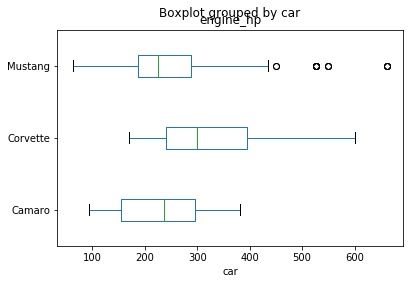

In [83]:
car_sales_df.boxplot(by='car', 
                       column=['engine_hp'], 
                       grid=False, vert=False)

In [85]:
print("Mustang has several points in the box plots far right upper quartile - ANOMALIES")

Mustang has several points in the box plots far right upper quartile - ANOMALIES
